In [1]:
import os
import shutil
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = []
path = "../datasets/lfw/"
new_path = "../datasets/faceData/"

In [3]:
# for i in os.listdir(path):
#     if len(os.listdir(path+i)) >= 10:
#         shutil.copytree(path+i,new_path+i)

FileExistsError: [Errno 17] File exists: '../datasets/faceData/Hugo_Chavez'

In [4]:
class batch_generator:
    def __init__(self,batch_size=32,
                 target_size=(128,128),
                 horizontal_flip=False,
                 rescale=1,
                 rotate=False,
                 other_transform = False,
                 path = "",
                 
                ):
        self.batch_size=batch_size
        self.target_size = target_size
        self.horizontal_flip = horizontal_flip
        self.rescale = rescale
        self.rotate = rotate
#         self.color_argumentation = color_argumentation
        self.other_transform = other_transform
        self.path = path
        self.x_shift = 0.5 * self.target_size[0]
        coeffs = self.find_coeffs(
            [(0, 0), (256, 0), (256, 256), (0, 256)],
            [(0, 0), (256, 0), (self.target_size[0], self.target_size[1]), (self.x_shift, self.target_size[1])])
        
    def read_image(self):
        dir_list = os.listdir(self.path)
        original = random.choice(dir_list)
        dir_list.remove(original)
        fake = random.choice(dir_list)
        img_list = os.listdir(os.path.join(self.path,original))
        anchor = random.choice(img_list)
        img_list.remove(anchor)
        positive = random.choice(img_list)
        img_list = os.listdir(os.path.join(self.path,fake))
        negative = random.choice(img_list)
        
        anchor_image = Image.open(os.path.join(self.path,original,anchor))
        negative_image = Image.open(os.path.join(self.path,fake,negative))
        positive_image = Image.open(os.path.join(self.path,original,positive))
        
        anchor_image = anchor_image.resize(self.target_size, Image.NEAREST) 
        positive_image = positive_image.resize(self.target_size, Image.NEAREST) 
        negative_image = negative_image.resize(self.target_size, Image.NEAREST)
        
        anchor_image = np.array(self.transform(anchor_image))
        positive_image = np.array(self.transform(positive_image))
        negative_image = np.array(self.transform(negative_image))
        
        return (anchor_image,positive_image,negative_image)
        
        
        
        
    def transform(self,img):
        
        if self.horizontal_flip and random.choice([True,False]) :
            img = img.transform(self.target_size,Image.FLIP_LEFT_RIGHT)
            
        if self.rotate :
            deg = random.randrange(0,359)
            img = img.rotate(deg)
            
        if self.other_transform :
            r = random.choice([True,False])
            if r:
                img = img.transform(self.target_size, Image.PERSPECTIVE, coeffs,Image.BICUBIC)
            else:
                img = img.transform(self.target_size, Image.AFFINE,(1, -0.5, -self.x_shift if -0.5 > 0 else 0, 0, 1, 0), Image.BICUBIC)
        
        return img
    
    def find_coeffs(self,pa, pb):
        matrix = []
        for p1, p2 in zip(pa, pb):
            matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
            matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

        A = np.matrix(matrix, dtype=np.float)
        B = np.array(pb).reshape(8)

        res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
        return np.array(res).reshape(8)

    
    def next(self):
        anchor = np.zeros((self.batch_size,)+self.target_size+(3,))
        positive = np.zeros((self.batch_size,)+self.target_size+(3,))
        negative = np.zeros((self.batch_size,)+self.target_size+(3,))
        
        for i in range(self.batch_size):
            a,p,n = self.read_image()
            anchor[i] = a
            positive[i] = p
            negative[i] = n
            
        return (anchor*self.rescale,positive*self.rescale,negative*self.rescale)
            
            
        
        

In [5]:
# test_gen = batch_generator(path=new_path,target_size=(256,256),horizontal_flip=False,rotate=True,other_transform = False,rescale=1./255)

In [6]:
a = test_gen.next()

In [7]:
i =0

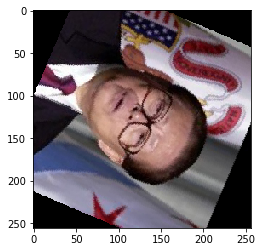

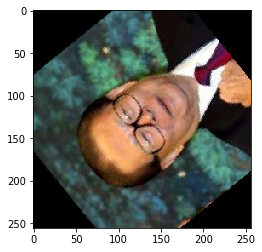

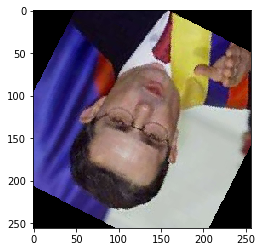

In [24]:
plt.imshow(a[0][i])
plt.show()
plt.imshow(a[1][i])
plt.show()
plt.imshow(a[2][i])
plt.show()
i+=1